312  315  -9  0.41998160896390907  0.450893
313  316  -9  0.01685345272709471  0.0167411
320  107  15  0.03527989197994247  0.03125
324  320  -9  0.025342882000349638  0.0111607
350  118  25  0.47011489679071067  0.347098
355  336  -9  0.019278364400537526  0.0145089
375  346  -9  0.016320799250148673  0.0200893
---------------------- cg ----------------------
-----------------------------------------------
log-log model
      (UniqueID, [NodeId, Time, Line, Gradient])
ROOT:   []
 
	
	(350, [118, 0.17344, 1304, [array([0.22199322, 0.22199322]), -3.7528332846423353], [], 25, 0.47011489679071067])
	(312, [315, 0.731469, 1193, [array([-0.13444821, -0.13444821]), 0.36177658245644584], [], -9, 0.41998160896390907])
	(320, [107, 0.0104031, 1218, [array([0.24625488, 0.24625488]), -7.780068603335426], [], 15, 0.03527989197994247])
	(324, [320, 0.00308843, 1221, [array([0.57215637, 0.57215637]), -12.168152062435544], [], -9, 0.025342882000349638])
	(355, [336, 0.00325098, 1326, [array([0.431124

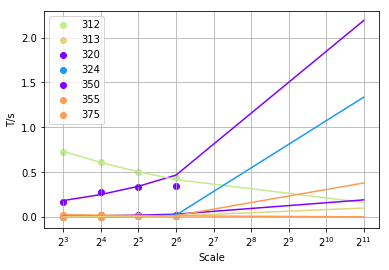

	
	(312, [315, 0.450893, 1193, [], [], -9])
	(350, [118, 0.347098, 1304, [], [], 25])
	(320, [107, 0.03125, 1218, [], [], 15])
	(375, [346, 0.0200893, 1392, [], [], -9])
	(313, [316, 0.0167411, 1196, [], [], -9])


In [38]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from __future__ import print_function
import sys
import tarfile
import numpy
import itertools
from sklearn import *
import scipy
from collections import OrderedDict
import matplotlib.cm as cm


colors = cm.rainbow(numpy.linspace(0, 1, 20))

commcolors = cm.rainbow(numpy.linspace(0, 1, 5))

#totalTime = [7.7267, 5.0229, 3.8007, 2.7246, 4.6318, 2.6734,2.9110,3.4679] #TEST_ft
#totalTime = [8.257,5.4874,3.7414,2.7122,4.5883,2.9054,3.4035,3.3367] #TEST_ft_2
#totalTime = [8.4103,5.104,3.6883,2.8361,4.3838,2.8163,2.9715,3.7069] #TEST_ft_3

#totalTime = [3.9554,2.6286,2.3025,2.3184,4.1871,2.7255,2.7732,3.8039]  #TEST_ft_4
#totalTime = [4.1214,2.5516,2.255,2.1955,4.3687,2.701,2.9837,3.5326]     #TEST_ft_5
#totalTime = [4.0906,2.6215,2.349,2.1515,4.192,2.736,3.0589,4.1926] #TEST_ft_6
#totalTime = [4.2649,2.6026,2.3072,2.1346,4.2532,2.69,2.9182,3.375] #TEST_ft_7

#totalTime = [57.0151,31.1849,17.0198,8.8117,7.7494,3.6474]  # ft
#totalTime = [715.0507,441.539,186.9814,94.1689,37.5255] #ft D
#totalTime = [34.5314, 15.9165, 9.8481, 6.3138, 4.9238, 4.1895]  #cg c
#totalTime = [4.14, 2.44 ,1.9, 1.63 ,1.47] # is
#totalTime = [1018.3535, 1940.6088, 2367.5028]
#totalTime =[148.5455,65.8871,38.5008,21.3047,11.8347,4.2592]

#totalTime = [16.7494,10.2972,6.6163,5.1845,2.2451] #Lulesh-strong
#totalTime = [80.2411,84.6114,85.5994,86.912,92.789] #Lulesh-weak
#totalTime = [472.647,263.4467,150.0709,93.653,54.5149,16.8697] #sweep3d
#totalTime = [98.3934,228.7799,237.5111,236.7862,312.81,329.0881] #amg

#totalTime = [715.0507,427.3992,186.9814,94.1689,51.7973,37.5255] #ft D 64 3node
#totalTime = [715.0507,597,186.9814,94.1689,51.7973,37.5255] #ft D 64 4node

#totalTime = [72.9415, 72.4831, 76.6140, 77.1012, 77.2990] #chol

#nprocs = [16, 32, 64, 128, 256, 2048]
#nprocs = [27,64,125,216,2197]
#nprocs = [32, 64, 128, 256, 2048]
nprocs = [8,16,32,64]
#nprocs = [16,32,64]

(COMPUTING, COMBINE, CALL_INDIRECT, CALL_REC, CALL, FUNCTION, COMPOUND, BRANCH, LOOP) = (i for i in range(-9, 0, 1))

topk = OrderedDict()
topk2 = OrderedDict()

rootResult = list()
uniqId = 0

class Node(object):
    def __init__(self,
                 i,
                 id,
                 type,
                 #firstType,
                 #lastType,
                 numChildren,
                 dirID,
                 fileID,
                 lineNum,
                 exitLineNum,
                 sampleCount,
                 sumTime):
        self.uniqueId = i
        self.id = id
        self.type = type
        #self.firstType = firstType
        #self.lastType = lastType
        self.children = [None] * numChildren
        self.parent= None
        self.dirID = dirID
        self.fileID = fileID
        self.lineNum = lineNum
        self.exitLineNum = exitLineNum
        self.sumTime = sumTime
        self.sampleCount = sampleCount
        if numChildren == 0 :
            self.flagNode =  1 # init flagNode =1 to all leaves
        else :
            self.flagNode =  0
        # sumTime only
        self.sumTimeList = [sumTime]
        self.sampleCountList = [sampleCount/100]
        self.pred = 0
        self.coef = []
        self.intercept = 0 
        self.crossPreds = []
        #print (  i,id,type,numChildren,dirID,fileID,lineNum,sumTime)

    def gatherOne(self, node):
        self.sumTimeList += node.sumTimeList
        self.sampleCountList += node.sampleCountList
        for i in range(len(self.children)):
            self.children[i].gatherOne(node.children[i])

    def rootFitRec(self, x, fitFunc, depth=0):
        global rootResult
        if self.id == 0:
            
            pred, coef = fitFunc( x , self.sumTimeList , x[-1] )
            self.pred = pred
            #self.crossPreds = crossPreds
            rootResult.append(self.uniqueId)
            rootResult.append([self.id, self.sumTimeList[0], self.lineNum,coef])
            #topk[self.uniqueId][2] = coef
            if self.sumTimeList[-1] > 1e-8:
                err = abs(self.sumTimeList[-1] - self.pred) / self.sumTimeList[-1] * 100
            else:
                err = 0
        #print(' ' * depth, end='')
        #print(self.type, self.fileID, self.lineNum, abs(self.sumTimeList[-1] - self.pred), self.pred, self.sumTimeList[-1])


    def leavesFitRec(self, x, fitFunc, depth=0):
            #global topk
        if self.flagNode == 1:
            #for i in range(len( self.sumTimeList)):
            #    self.sumTimeList[i] *= self.sampleCountList[i]
            for i in range(len(self.sumTimeList)-1):
                    if self.sumTimeList[i] == 0:
                        #self.sumTimeList[i] = 0.0001
                        return
            pred, coef, intercept= fitFunc(x[:-1], self.sumTimeList[:-1], x[-1])
            
            self.pred = pred
            self.coef = coef
            self.intercept = intercept
            
            #self.crossPreds = crossPreds
            #topk[self.uniqueId][3].append(coef)
            #topk[self.uniqueId][3].append(intercept)
            
            if self.sumTimeList[-1] > 1e-8:
                err = abs(self.sumTimeList[-1] - self.pred) / self.sumTimeList[-1] * 100
            else:
                err = 0
            #print(' ' * depth, end='')
            #print(self.type, self.fileID, self.lineNum, abs(self.sumTimeList[-1] - self.pred), self.pred, self.sumTimeList[-1])

        for child in self.children:
            child.leavesFitRec(x, fitFunc, depth+1)

    def leavesInflectionPointAnalysis(self, x, analysFunc, threshold):
        global topk
        if self.flagNode == 1:
            firstPoint = 0
            lastPoint = 0
            
            lx = numpy.log2(x)
            plt.scatter(lx, self.sumTimeList,  color='red')
            plt.show()

            grad = analysFunc(x[firstPoint:lastPoint + 1], self.sumTimeList[firstPoint:lastPoint + 1])
            
            inflectionPoint = list()
            inflectionPoint.append([ firstPoint, grad]) # init point (0) and gradient 
            lastPoint += 1

            while lastPoint < len(x):
                grad = analysFunc(x[firstPoint:lastPoint + 1], self.sumTimeList[firstPoint:lastPoint + 1])
                if abs(grad - inflectionPoint[-1][1]) > threshold:
                    firstPoint = lastPoint - 1
                    grad = analysFunc(x[firstPoint:lastPoint + 1], self.sumTimeList[firstPoint:lastPoint + 1])
                    inflectionPoint.append([ firstPoint, grad])
                lastPoint += 1

            topk[self.uniqueId][4] = inflectionPoint

            return 
            

        for child in self.children:
            child.leavesInflectionPointAnalysis(x, analysFunc, threshold)

    def getNodeNum(self):
        num = 1
        if self.type < 0 and self.type not in (FUNCTION, COMPOUND, BRANCH, LOOP):
            num = 0
        if len(self.children) == 0:
            return num
        for child in self.children:
            num += child.getNodeNum()
        return num
    
    def leavesHotSpot(self, x, k):
        global topk
        #print (type(topk))
        if self.flagNode == 1:
            #print (topk.items())
            if len(topk.keys()) < k:
                topk[self.uniqueId] = [self.id , self.sumTimeList[0], self.lineNum, list(), list(), self.type, self.pred]
                topk[self.uniqueId][3].append(self.coef)
                topk[self.uniqueId][3].append(self.intercept)
                topk = OrderedDict(sorted(topk.items(),key=lambda x: x[1][6] ,reverse=True))
                return 
            i = 0
            for ke,value in topk.items(): #problem : if id is already a key in topk, it cannot insert again
                i += 1
                if i == k: # the last one and the shortest time
                    if self.pred > value[6]:
                        topk.pop(ke)
                        topk[self.uniqueId] = [self.id , self.sumTimeList[0],self.lineNum, list(),list(), self.type, self.pred ]
                        topk[self.uniqueId][3].append(self.coef)
                        topk[self.uniqueId][3].append(self.intercept)
                        topk = OrderedDict(sorted(topk.items(),key=lambda x: x[1][6] ,reverse=True))
                    return
            
        for child in self.children:
            child.leavesHotSpot(x, k)
            
            
            
    def leavesHotSpot2(self, x, k, pid):
        global topk2
        
        if len(self.children) == 0:
            #print (topk.items())
            if len(topk2.keys()) < k:
                #print (topk.keys())
                #if self.id not in topk.keys():
                topk2[self.uniqueId] = [self.id , self.sumTimeList[pid],self.lineNum, list(), list(), self.type]
                #else:

                topk2 = OrderedDict(sorted(topk2.items(),key=lambda x: x[1][1] ,reverse=True))
                return 
            i = 0
            for ke,value in topk2.items(): #problem : if id is already a key in topk, it cannot insert again
                i += 1
                if i == k: # the last one and the shortest time
                    if self.sumTimeList[pid] > value[1]:
                        topk2.pop(ke)
                        topk2[self.uniqueId] = [self.id , self.sumTimeList[pid],self.lineNum, list(),list(),self.type]
                        topk2 = OrderedDict(sorted(topk2.items(),key=lambda x: x[1][1] ,reverse=True))
                    return
            
        for child in self.children:
            child.leavesHotSpot2(x, k, pid)

    def leavesSetHotSpotFlag(self):
        global topk
        global colors
        #if self.uniqueId == 220:
        #    return
        if self.uniqueId == 565:
                plt.scatter(nprocs, self.sumTimeList,  color=commcolors[self.type%5], label = str(self.uniqueId))
                plt.plot(nprocs, self.sumTimeList,  color=commcolors[self.type%5], label = str(self.uniqueId))
        if self.flagNode == 1:
            
            if self.uniqueId in topk.keys():
                #lx = numpy.log2([32, 64, 128, 256, 512, 1024, 2048])
                
                #lx = numpy.log2(nprocs)
                
                for i in range(len(self.sumTimeList)-1):
                    if self.sumTimeList[i] == 0.0:
                        #self.sumTimeList[i] = 0.0000000001
                        return
                
                print(self.uniqueId,self.id, self.type,self.pred,self.sumTimeList[-1],sep='  ')
                
                #if self.uniqueId != 186 and self.uniqueId != 31:
                #    self.flagNode = 1
                #    return
                
                if self.type >= 0:
                    plt.scatter(nprocs, self.sumTimeList,  color=commcolors[self.type%5], label = str(self.uniqueId))
                else:
                    plt.scatter(nprocs, self.sumTimeList,  color=colors[self.uniqueId%20], label = str(self.uniqueId))
                #plt.plot(lx, self.sumTimeList,  color=colors[self.uniqueId], label = str(self.uniqueId))
                
                
                
                self.flagNode = 1
                return
            self.flagNode = 0
            return
   
        for child in self.children:
            child.leavesSetHotSpotFlag() 

    


def readTree(f):
    global uniqId
    types = [int, int, int, int, int, int, int, int, float]
    args = list(map(lambda x: x[0](x[1]), zip(types, f.readline().decode('utf-8').strip().split(' '))))
    args.insert(0, uniqId)
    uniqId += 1
    node = Node(*args)
    for i in range(len(node.children)):
        node.children[i] = readTree(f)
        node.children[i].parent = node
    return node

def trimTree(node):
    for child in node.children:
        trimTree(child)

    remove = [False] * len(node.children)
    for i in range(len(node.children)):
        child = node.children[i]
        if child.type in (CALL_REC, CALL_INDIRECT):
            assert len(child.children) == 0
            remove[i] = True
        elif child.type == CALL:
            assert len(child.children) == 1 and child.children[0].type == FUNCTION
            node.children[i] = child.children[0]
        elif child.type == BRANCH:
            assert child.sumTime == 0
            sumTime = 0
            for cc in child.children:
                sumTime += cc.sumTime
            child.sumTime = sumTime
            child.sumTimeList = [sumTime]
    newChildren = []
    for i in range(len(node.children)):
        if not remove[i]:
            newChildren.append(node.children[i])
    node.children = newChildren

def printTime(node, depth):
    print(' ' * depth, end='')
    print([node.type, node.sumTime, node.sampleCount])
    for child in node.children:
        printTime(child, depth + 1)


def gatherTime(node):
    def gatherTimeRec(node, out):
        out.append((node.type, node.sumTime))
        for child in node.children:
            gatherTimeRec(child, out)
    ret = []
    gatherTimeRec(node, ret)
    return ret


def sumLeaves(node):
    if len(node.children) == 0:
        return node.sumTime
    sumTime = 0
    for child in node.children:
        sumTime += sumLeaves(child)
    return sumTime


def gatherLeafTimeRec(node, out):
    if len(node.children) == 0:
        out.append(node.sumTime)
        return
    for child in node.children:
        gatherLeafTimeRec(child, out)

def predictWithLeaves(train_nps, train_trees, pred_np, pred_func):
    trainLeafTime = []
    for tree in train_trees:
        leafTime = []
        gatherLeafTimeRec(tree, leafTime)
        trainLeafTime.append(leafTime)
    trainLeafTime = list(map(list, zip(*trainLeafTime)))
    preds = []
    for nt in trainLeafTime:
        pt = pred_func(train_nps, nt, pred_np)
        preds.append(pt)
    #b = numpy.array(preds)
    #print (preds)
    # print(','.join(list(map(str, preds))))
    return numpy.sum(preds)

def loglogfit(x, y, px):
    zero = False
    for yy in y:
        if yy < 1e-8:
            zero = True
            break
    if zero:
        return 0, [0 for _ in range(len(y))]

    lx = numpy.log2(x)
    ly = numpy.log2(y)
    input_x = list(map(lambda t: [t,t], lx))

    # Cross validation
    crossPreds = []
    #for i in range(len(lx)):
    #    cx = []
    #    cy = []
    #    for j in range(len(lx)):
    #        if j != i:
    #            cx.append(input_x[j])
    #            cy.append(ly[j])
    #    regr = linear_model.LinearRegression()
    #    regr.fit(cx, cy, numpy.exp2(cy))
    #    clpred = regr.predict([input_x[i]])[0]
    #    cpred = 2 ** clpred
    #    crossPreds.append(cpred)

    regr = linear_model.LinearRegression()
    regr.fit(input_x, ly, y)
    coef = regr.coef_
    lpx = numpy.log2(px)
    lpred = regr.predict([[lpx, lpx]])[0]
    #print (regr.coef_)
    #print (regr.intercept_)

    return 2 ** lpred, coef, regr.intercept_

def loglogfit3(x, y, px):
    zero = False
    for yy in y:
        if yy < 1e-8:
            zero = True
            break
    if zero:
        return 0, [0 for _ in range(len(y))]

    lx = numpy.log2(x)
    ly = numpy.log2(y)
    input_x = list(map(lambda t: [t, numpy.log2(t)], lx))

    regr = linear_model.LinearRegression()
    regr.fit(input_x, ly, numpy.sqrt(y))
    coef = regr.coef_
    lpx = numpy.log2(px)
    lpred = regr.predict([[lpx, numpy.log2(lpx)]])[0]
    #print (regr.coef_)
    #print (regr.intercept_)

    return 2 ** lpred, coef, regr.intercept_




def loglogfit2(x, y, px):
    zero = False
    for yy in y:
        if yy < 1e-8:
            zero = True
            break
    if zero:
        return 0, [0 for _ in range(len(y))]

    lx = numpy.log2(x)
    ly = numpy.log2(y)
    input_x = list(map(lambda t: [t, numpy.log2(t)], lx))

    # Cross validation
    crossPreds = []
    for i in range(len(lx)):
        cx = []
        cy = []
        for j in range(len(lx)):
            if j != i:
                cx.append(input_x[j])
                cy.append(ly[j])
        regr = linear_model.LinearRegression()
        regr.fit(cx, cy, numpy.sqrt(numpy.exp2(cy)))
        clpred = regr.predict([input_x[i]])[0]
        cpred = 2 ** clpred
        crossPreds.append(cpred)

    regr = linear_model.LinearRegression()
    regr.fit(input_x, ly, numpy.sqrt(y))
    coef = regr.coef_
    lpx = numpy.log2(px)
    lpred = regr.predict([[lpx, numpy.log2(lpx)]])[0]
    print (lx)
    print (input_x)
    print (ly)
    print (regr.coef_)

    return 2 ** lpred, crossPreds, coef


def logisticfit(x, y, px):
    zero = False
    for yy in y:
        if yy < 1e-8:
            zero = True
            break
    if zero:
        return 0, [0 for _ in range(len(y))]

    #lx = numpy.log2(x)
    ly = numpy.log2(y)

    def genParams(x):
        logx = numpy.log2(x)
        ps = []
        ps.append(logx)
        return ps
    input_x = list(map(genParams, x))
    input_y = list(map(genParams, y))
    #input_y=input_y.astype('float')

    # Cross validation
    crossPreds = []
    for i in range(len(input_x)):
        cx = []
        cy = []
        for j in range(len(input_x)):
            if j != i:
                cx.append(input_x[j])
                cy.append(input_y[j])
        regr = linear_model.LogisticRegression(tol = 0.1,max_iter=5000)
    cy = numpy.array(cy,dtype=int)
    print(cx)
    print(cy)
    regr.fit(cx, cy)
    clpred = regr.predict([input_x[i]])[0]
    cpred = 2 ** clpred
    crossPreds.append(cpred)

    regr = linear_model.LogisticRegression(tol = 0.1,max_iter=5000)
    input_y = numpy.array(input_y,dtype=int)
    regr.fit(input_x, input_y)
    coef = regr.coef_
    lpx = numpy.log2(px)
    pred = regr.predict([[lpx]])[0]
    #print (coef)

    return pred, crossPreds, coef

def lassofit(x, y, px):
    zero = False
    for yy in y:
        if yy < 1e-8:
            zero = True
            break
    if zero:
        return 0, [0 for _ in range(len(y))]

    def genParams(x):
        #js = (-1, 0, 1.0/3, 1.0/2, 2, 3.0/2, 3)
        # js = (-1, 0, 1, 2)
        #ls = (0, 1, 2)
        logx = numpy.log2(x)
        ps = []
        #for j in js:
        #    for l in ls:
        #        ps.append((x ** j) * (logx ** l))
        ps.append(logx)
        return ps

    input_x = list(map(genParams, x))

    # Cross validation
    crossPreds = []
    for i in range(len(input_x)):
        cx = []
        cy = []
        for j in range(len(input_x)):
            if j != i:
                cx.append(input_x[j])
                cy.append(y[j])
        regr = linear_model.Lasso(alpha=0.1, tol=0.1, max_iter=5000)
        regr.fit(cx, cy)
        #print(regr.sparse_coef_)
        cpred = regr.predict([input_x[i]])[0]
        crossPreds.append(cpred)

    # print(crossPreds)
    # print(y)

    regr = linear_model.Lasso(alpha=0.1, tol=0.1, max_iter=5000)
    regr.fit(input_x, y)
    pred = regr.predict([genParams(px)])[0]
    print(regr.coef_)

    return pred, crossPreds, regr.coef_


def curvefit(x, y, px):
    # def func(t, a, b, c):
    #     return a * (t ** b) + c
    def func(t, a, b):
        return a * (t ** b)

    zero = False
    for yy in y:
        if yy < 1e-8:
            zero = True
            break
    if zero:
        return 0, [0 for _ in range(len(y))]

    # Cross validation
    crossPreds = []
    for i in range(len(x)):
        cx = []
        cy = []
        for j in range(len(x)):
            if j != i:
                cx.append(x[j])
                cy.append(y[j])
        popt, pcov = scipy.optimize.curve_fit(func, cx, cy, maxfev=100000)
        cpred = func(x[i], *popt)
        crossPreds.append(cpred)

    popt, pcov = scipy.optimize.curve_fit(func, x, y, maxfev=100000)
    pred = func(px, *popt)
    #print (popt)

    return pred,  popt[1]


def twopointfit(x,y):
    start = 0
    end = len(x) - 1
    logx = numpy.log2(x)
    #print (start,end)
    grad = 1 #float(y[-1] - y[0]) / float(logx[-1] - logx[0])
    return grad

def linearfit(x, y):
    #zero = False
    #for yy in y:
    #    if yy < 1e-8:
    #        zero = True
    #        break
    #if zero:
    #    return 0, [0 for _ in range(len(y))]

    lx = numpy.log2(x)
    #ly = numpy.log2(y)
    input_x = list(map(lambda t: [t], lx))

    regr = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
    regr.fit(input_x, y)
    coef = regr.coef_
    
    y_pred = regr.predict(input_x)
    
    plt.scatter(lx, y,  color='red')
    plt.plot(lx, y_pred, color='blue', linewidth=3)

    #plt.xticks(())
    #plt.yticks(())

    plt.show()
    #lpx = numpy.log2(px)
    #lpred = regr.predict([[lpx]])[0]
    print (coef)

    return coef[0]


if __name__ == '__main__':
    # overhead()
    # exit(0)
    #bms = ['bt', 'cg', 'ep', 'ft', 'mg', 'sp', 'lu', 'is']
    #bms = ['bt', 'cg' , 'ep' , 'ft' , 'mg' ,'sp' , 'is']

    bms = ['cg']
    #bms = ['sweep3D']
    #bms = ['Lulesh2.0']
    #bms = ['amg']
    #bms = ['chol_decom_MPI']
    #np1 = [16, 32, 64, 128, 256, 512, 1024, 2048]
    #np1 = [16, 32, 64, 128, 256] # , 512, 1024, 2048]
    # np1 = [16, 32, 64, 128, 256, 512]
    #np2 = [4, 9, 16, 36, 64] #16, 36, 64, 121, 256, 529, 1024]
    #np2 = [16, 36, 64, 121, 256, 2025] #, 1024]
    #tf = tarfile.open('./TEST_ft_7.tar.gz', 'r')
    tf = tarfile.open('./npb_C_cg-4.2-insert6.tar.gz', 'r')
    #tf = tarfile.open('./npb_ft_D_16-512_TH20190314_64-4node.tar.gz', 'r')
    #tf = tarfile.open('./npb_D_16-256_TH20190305.tar.gz','r')
    #tf = tarfile.open('./GRAPH500.tar.gz', 'r')
    #tf = tarfile.open('./Lulesh2.0-strong-5.3.tar.gz','r')
    #tf = tarfile.open('./Lulesh2.0-strong-barrier.tar.gz','r')
    #tf = tarfile.open('./SWEEP3D.tar.gz','r')
    #tf = tarfile.open('./AMG_16-256.tar.gz','r')
    #tf = tarfile.open('./choldecomMPItest.tar.gz','r')
    #tf = tarfile.open('./npb_C_cg_16-256_2048_TH20190404-2.tar.gz', 'r')
    
    for bm in bms:
        
        nps = nprocs
        # print(bm)

        mergedTrees = []
        for np in nps: 
            # Read trees
            uniqId = 0
            trees = []
            # for rank in range(np):
            for rank in range(1):  # read only process 1 : stat0.txt
                #path = './npbrun/C/%s/%d/stat%d.txt' % (bm, np, rank)
                #path = './%s/%d/stat%d.txt' % (bm, np, rank)
                path = './run-with-all-leafnode/C/%s/%d/stat%d.txt' % (bm, np, rank)
                f = tf.extractfile(tf.getmember(path))
                root = readTree(f)
                # print(root.getNodeNum())
                #trimTree(root)
                trees.append(root)

            # mergeTrees(trees)
            mergedTrees.append(trees[0]) # contains stat0.txt of all nps

        for i in range(1, len(mergedTrees)):
            mergedTrees[0].gatherOne(mergedTrees[i])

        gatheredTree = mergedTrees[0]  # merge[i] is merged to merge[0] 

        #printTime(gatheredTree,0)
        
        
        #gatheredTree.fitRec(nps, curvefit)
        topk.clear()
        
        #gatheredTree.rootFitRec(nps,loglogfit)
        gatheredTree.leavesFitRec(nps, loglogfit)
        
        gatheredTree.leavesHotSpot(nps, 7)
        gatheredTree.leavesSetHotSpotFlag()
        
        
        #plt.xscale('log', basex = 2)
        #plt.yscale('log', basey = 2)
        plt.ylabel('T/s')
        plt.xlabel('Scale')
        #plt.legend()
        #plt.show()
        rootResult = []
        

        
        

        #gatheredTree.leavesInflectionPointAnalysis(nps, twopointfit, 10)

        print ("----------------------",bm,"----------------------")
        print ("-----------------------------------------------")
        print ("log-log model")
        print ("      (UniqueID, [NodeId, Time, Line, Gradient])")
        print ("ROOT:  ",rootResult)
        print (" ")
        print ("	",*topk.items(),sep = "\n	")
        
        
        for k,v in topk.items():
            #if k == 220:
            #    continue
            if len(v[3]) == 0: 
                continue
            x = [8,16,32,64,2048]
 
            #y = numpy.exp2(numpy.log2(x) * v[3][0][0] + numpy.log2(numpy.log2(x)) * v[3][0][1] + v[3][1])
            y = numpy.exp2(numpy.log2(x) * v[3][0][0] + numpy.log2(x) * v[3][0][1] + v[3][1])
            if v[5] >= 0:
                #print(k)
                plt.plot(x, y,  color=commcolors[v[5]%5])#, label = str(k))
            else:
                plt.plot(x, y,  color=colors[k%20])#, label = str(k))
 
        plt.xscale('log', basex = 2)
        #plt.yscale('log', basey = 10)
        plt.grid()
        plt.ylabel('T/s')
        plt.xlabel('Scale')
        
        plt.legend()
        plt.show()

        
        
        
        gatheredTree.leavesHotSpot2(nps, 5, len(nps)-1)
        
        print ("	",*topk2.items(),sep = "\n	")
        
        
        
        
        #potentialHotspot = dict()
        
        
        #for k,v in topk.items(): 
        #    for k0, v0 in topk0.items():
        #        if k0 == k:
                    
        #            if (v[1] / gatheredTree.sumTimeList[ len(nps) - 1 ])  -  (v0[1] / gatheredTree.sumTimeList[0]) >= 0:
        #                potentialHotspot[k] = (v[1] / gatheredTree.sumTimeList[ len(nps) - 1 ])  -  (v0[1] / gatheredTree.sumTimeList[0])
                        
        #print("    ",*potentialHotspot.items() , sep="\n")
                        


In [35]:
def findNodeWithUniqueId(node, uid):
    if node.uniqueId == uid: 
        return node, True;
    for child in node.children:
        findNode, findFlag = findNodeWithUniqueId(child, uid);
        if findFlag == True:
            return findNode, True;
    return node, False

def printPath(node):
    if node.parent == None:
        print(node.uniqueId, node.id, node.type, "0", node.dirID, node.fileID, node.lineNum, node.exitLineNum, node.sampleCount,node.sumTime)
        return 
    else:
        print(node.uniqueId, node.id, node.type, "1", node.dirID, node.fileID, node.lineNum, node.exitLineNum, node.sampleCount,node.sumTime)
        printPath(node.parent)

findNode0, findFlag = findNodeWithUniqueId(gatheredTree,1542)
printPath(findNode0)
#print("\n")
findNode1, findFlag = findNodeWithUniqueId(gatheredTree,644)
printPath(findNode1)
#print("\n")
findNode3, findFlag = findNodeWithUniqueId(gatheredTree,647)
printPath(findNode3)
#print("\n")
findNode3, findFlag = findNodeWithUniqueId(gatheredTree,648)
printPath(findNode3)
#print(findNode0.uniqueId,findNode0.lineNum,findNode0.exitLineNum,findNode0.fileID)
#print(findNode1.uniqueId,findNode1.lineNum,findNode1.exitLineNum,findNode1.fileID)
#print(findNode2.uniqueId,findNode2.lineNum,findNode2.exitLineNum,findNode2.fileID)
#print(findNode3.uniqueId,findNode3.lineNum,findNode3.exitLineNum,findNode3.fileID)
#print(findNode4.uniqueId,findNode4.lineNum,findNode4.exitLineNum,findNode4.fileID)

1542 1210 -9 1 0 0 1574 1585 52 0.0616114
1537 395 -4 1 0 0 1574 1610 0 0.0
1536 394 -5 1 0 0 2435 2435 0 0.0
1535 393 -4 1 0 0 2433 2444 0 0.0
1534 392 -5 1 0 0 2618 2618 0 0.0
574 272 -4 1 0 0 2602 2646 0 0.0
573 271 -5 1 0 0 2749 2749 0 0.0
566 266 -1 1 0 0 2746 2758 0 0.0
0 6 -4 0 0 0 2651 2792 0 0.0
644 762 -9 1 0 0 1011 1036 40 0.0473934
642 284 -1 1 0 0 1011 1042 0 0.0
641 283 -4 1 0 0 997 1057 0 0.0
640 282 -5 1 0 0 1094 1094 0 0.0
635 279 -4 1 0 0 1063 1101 0 0.0
634 278 -5 1 0 0 1123 1123 0 0.0
578 276 -4 1 0 0 1105 1136 0 0.0
577 275 -5 1 0 0 1236 1236 0 0.0
576 274 -4 1 0 0 1225 1269 0 0.0
575 273 -5 1 0 0 2610 2610 0 0.0
574 272 -4 1 0 0 2602 2646 0 0.0
573 271 -5 1 0 0 2749 2749 0 0.0
566 266 -1 1 0 0 2746 2758 0 0.0
0 6 -4 0 0 0 2651 2792 0 0.0
647 764 -9 1 0 0 1043 1057 58 0.0687204
641 283 -4 1 0 0 997 1057 0 0.0
640 282 -5 1 0 0 1094 1094 0 0.0
635 279 -4 1 0 0 1063 1101 0 0.0
634 278 -5 1 0 0 1123 1123 0 0.0
578 276 -4 1 0 0 1105 1136 0 0.0
577 275 -5 1 0 0 1236 1236

In [ ]:
22 11 42